# Introduction 

(her må det skrives litt)

# TASK 1a

Here we want to SVD factorise a matrix 

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

A_1 = np.array([[1000,1],[0,1],[0,0]])
A_2 = np.array([[1,0,0],[1,0,0],[0,0,1]])
B = np.array([[2,0,0],[1,0,1],[0,1,0]])


def SVD(A):
    """
    Parameters
    ----------
    A : array
        Matrise.

    Returns u, sigma, v_t
    -------
    array, array, array
        returns u, sigma og v in an SVD

    """
    return np.linalg.svd(A,full_matrices = False)  

u, sigma, v = SVD(A_1)
print("The U matrix =", "\n",u)
print("The Sigma matrix =", "\n",sigma)
print("The V matrix =", "\n",v.T)
print("A_1 by multiplying U, Sigma and V transposed", "\n",u*sigma@v)




The U matrix = 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]
The Sigma matrix = 
 [1.0000005e+03 9.9999950e-01]
The V matrix = 
 [[ 0.9999995 -0.001    ]
 [ 0.001      0.9999995]]
A_1 by multiplying U, Sigma and V transposed 
 [[ 1.00000000e+03  1.00000000e+00]
 [-2.16840434e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]



The vectors corresponding to the largest singular values in the sigma matrix are the most important in the dictionary because sigma is ordered from highest to lowest.

# TASK 1b

Now we want truncate the matrix. 

In [242]:

def truncSVD(u, sigma, v_t, d):
    """
    Parameters
    ----------
    u : array
    sigma : array
    v_t : array
    Returns W_d, H
    -------
    array, array, 
        reduced version of u and sigma * v_t
    """
    #Slices out the d first comlums of W_d
    W_d = u[:,0:d]
    #Slices out the first d components.
    sigma_d = sigma[:d-1]
    v_t_d = v_t[0:d-1]
    H = (sigma_d@v_t_d)
    return W_d, H

u, sigma, v = SVD(A_2)

W, H = truncSVD(u, sigma, v, 2)
sigma = sigma[:2]
print("The sigma vector", "\n", sigma)

v = v[0:2]
print("v transposed", "\n",v)
print("The truncated u matrix, W","\n",W)
print("A_2 by multiplying U, Sigma and V transposed","\n",W*sigma@v)


The sigma vector 
 [1.41421356 1.        ]
v transposed 
 [[-1. -0. -0.]
 [ 0.  0.  1.]]
The truncated u matrix, W 
 [[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [ 0.          1.        ]]
A_2 by multiplying U, Sigma and V transposed 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


The vectors from U corresponding to the singular values equal to zero in sigma are irrelvant. This tells us that
the columns in A_2 are linearly dependent. From the last result one can see that A_2 can be reconstructed from the truncated SVD.

# Task 1c

With the code under we want to find the orthogonal projection of a new dataset B, onto the truncaded basis as well as finding the distance between them. 

In [219]:
"Task 1c"
def orthproj(W, B):
    """
    Parameters
    ----------
    W : array
        Othagonal reduced U matrix.
    
    B : array
        Matrix of b vectors.

    Returns P_w
    -------
    array
        Orthagonl projection of B onto W.
    """   
    p_w = W.T@B  
    P_w = W@p_w
    return P_w;

def col_distance(P_w,B):
    """
    Parameters
    ----------
    P_w : array
        Projeksjon av B på W.
        
    B : array
        Matrix of b vectors.

    Returns D_w
    -------
    array
        List of columnvise distance from B to W.
    """
    n = len(B)
    D_w = np.zeros(n)
    D_w = np.linalg.norm(P_w-B, axis=0)
    return D_w


u, sigma, v = SVD(A_1)
W, H =(truncSVD(u, sigma, v, 3))
print("Projection from B to W for A_1","\n",orthproj(W, B)) 

P_w = orthproj(W, B)
print("Distance between B and W for A_1","\n",col_distance(P_w, B)) 

u, sigma, v = SVD(A_2)
W, H =(truncSVD(u, sigma, v, 3))
print("Projection from B to W for A_2","\n",orthproj(W, B)) 

P_w = orthproj(W, B)
print("Distance between B and W for A_2","\n",col_distance(P_w, B)) 

Projection from B to W for A_1 
 [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]
Distance between B and W for A_1 
 [0.00000000e+00 1.00000000e+00 1.11022302e-16]
Projection from B to W for A_2 
 [[ 2.00000000e+00  0.00000000e+00 -1.11022302e-16]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]]
Distance between B and W for A_2 
 [1.44328993e-15 0.00000000e+00 2.48253415e-16]


# Task 1d

You can also find the projection of B onto A by using a non-negative ENMF approach without truncating and making a basis directly from A. This is what we want to test. 

In [244]:
"1d"
def nnproj(B,A,maxiter, delta):
    """
    Parameters
    ----------
    B : array
        Matrix of b vectors.
    A : array
        Image matrix.
    maxiter : int
        Max iteratons of the H approximation.
    delta : float
        To avoid division by zero.
    Returns
    -------
    P_w : array
        Projection of B onto A.
    H : array
        weights matrix.
    """
    A_copy = np.copy(A)
    W = A_copy[:, 0:2]
    WTW = W.T@W
    WTB = W.T@B
    
    d = WTW.shape[1]
    n = B.shape[1]
    #initial estimate for H from random numbers between 0 and 1
    H = np.random.uniform(0,1,(d,n)) 
    #Numerical algorithm for non-negative projections
    for i in range(maxiter):
        H = np.divide(np.multiply(H,WTB),WTW@H+delta*np.ones((d,n)))
    
    P_w = W@H
    return P_w, H




P_w, H = nnproj(B,A_1,50, 10**-10)
print("Projection A_1","\n", P_w, "\n", "Weights A_1","\n",H)
print("Distance from B to A_1 with non-negative projection","\n",col_distance(P_w, B))

P_w, H = nnproj(B,A_2,50, 10**-10)
print("Projection A_2","\n", P_w, "\n", "Weights A_2","\n",H)
print("Distance from B to A_2 with non-negative projection","\n",col_distance(P_w, B)) 



Projection A_1 
 [[2.00038639 0.         0.5       ]
 [0.99922632 0.         0.5       ]
 [0.         0.         0.        ]] 
 Weights A_1 
 [[0.00100116 0.         0.        ]
 [0.99922632 0.         0.5       ]]
Distance from B to A_1 with non-negative projection 
 [8.64796637e-04 1.00000000e+00 7.07106781e-01]
Projection A_2 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  0.  0. ]] 
 Weights A_2 
 [[1.5 0.  0.5]
 [0.  0.  0. ]]
Distance from B to A_2 with non-negative projection 
 [0.70710678 1.         0.70710678]


# Task 2a

In this task we will look at images and how they are projected with SVD and ENMF and also calculate the distance between the image and the dictionary. Below is code that plots images from the dataset and we use this to print 16 images from a handed out dataset. 

In [221]:
def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n > nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()

First 16 9s in train dataset


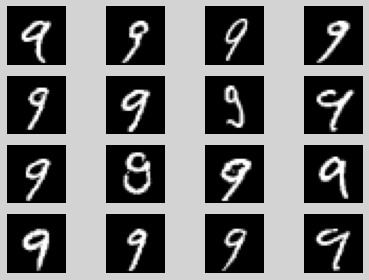

In [222]:


train = np.load('train.npy')/255
test = np.load('test.npy')/255

print("First 16 9s in train dataset")
plotimgs(train[:,9,:], nplot = 4)

n = 1000 # Number of datapoints
c = 9 # Class


A = train[:,c,:n] 

# Task 2b

Now we plot the first 16 singular vectors of the training data A as well ar a logarithmic plot of the singular values. 

Fist 16 left singular vectors of A


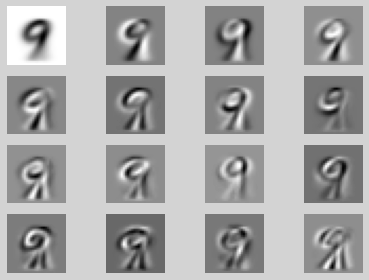

Rank of A: 475


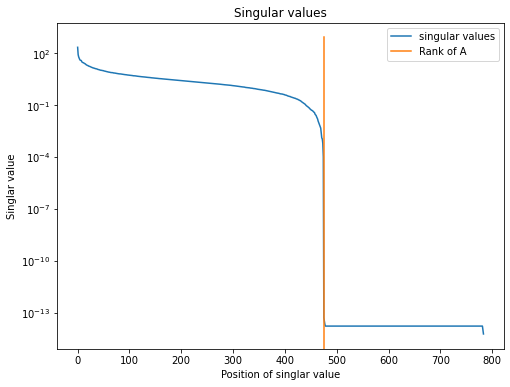

In [223]:
u, sigma, v = SVD(A)
#plots the first 16 basisvectors in u after the svd
print("Fist 16 left singular vectors of A")
plotimgs(u, nplot = 4)
#plots the singular values
plt.figure(figsize =(8,6))
plt.semilogy(sigma, label = "singular values")
plt.title("Singular values")
plt.xlabel("Position of singlar value")
plt.ylabel("Singlar value")

a = np.linalg.matrix_rank(A)
print("Rank of A:", a)
plt.plot([a,a],[0,800], label = "Rank of A" )
plt.legend()
plt.show()

From the 16 images one can see that they are 9s, however some of them are very distorted.
We see the plot goes to zero after around the 500th singular point, therefore the data after this point is redundant. After this point the vectors become linearly dependant and can span the whole subspace.
From the plots one can see that the rank of the matrix is equal to the amout of non-zero singular points.

# Task 2c 

We want to look at what happens to a projected image with different values of d, i.e. how many vectors are used to make the basis B is projected onto. This is done for both an integer that W is trained on, as wall as an integer it is not trained on. 

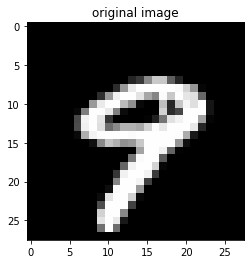

Plots for 9 projected on 9


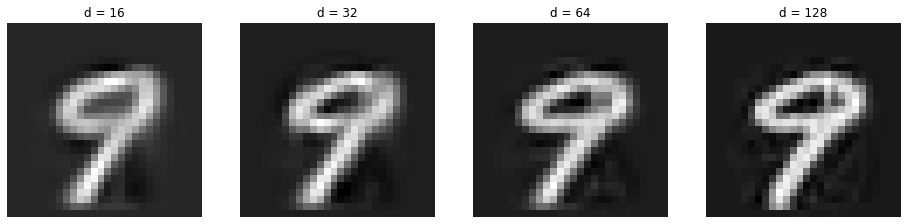

Plots for 4 projected on 9


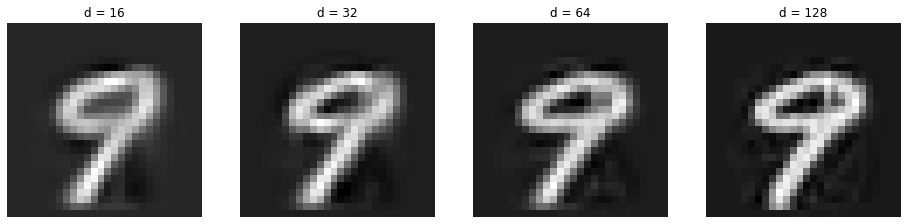

In [224]:
b = test[:,c,1];    
plt.imshow(b.reshape(28,28), cmap = 'gray')
plt.title("original image")
plt.show()


print("Plots for", c, "projected on", c)
plt.figure(figsize=(16, 5))
d_list = np.array([16,32,64,128])
#Plots the projection of b onto U_d, for d = 16,32,64,128
for i in range(len(d_list)):
    U_d = truncSVD(u, sigma, v, d_list[i])[0]
    P_w = orthproj(U_d, b)
    plt.subplot(141+i)
    plt.imshow(P_w.reshape(28,28), cmap = 'gray')
    plt.axis('off')
    plt.title("d = "+ str(d_list[i]))

plt.show()
#For another int its not trained on: (noen lag subplots plz)
#Plot of origianl image
c2 = 4
print("Plots for",c2, "projected on",c)
b = test[:,9,1];    

#plt.title("OG image")
plt.figure(figsize=(16, 5))

d_list = np.array([16,32,64,128]) 
#Plots the projection of b onto U_d, for d = 16,32,64,128

for i in range(len(d_list)):
    U_d = truncSVD(u, sigma, v, d_list[i])[0]
    P_w = orthproj(U_d, b)
    plt.subplot(141+i)
    plt.imshow(P_w.reshape(28,28), cmap = 'gray')
    plt.axis("off")
    plt.title("d = "+ str(d_list[i]))  
 
          

plt.show()

For 9 projected on 9 the picture becomes more detailed with larger d where d is the amount of vectors left in the matrix after it has been truncated. This is apperent with the between the last and first projections from 9 to 9, since in the last one is the only one to include the line down from the top of the 9. 

In the case of 4 projected on to 9, with a larger d you have a large enough basis to reconstruct the 4 almost perfectly. This makes it difficult to distinguish and classify the different integers. 

When a number is projected on to its own basis, it's more accurate even with a lower d. While a number projected on to a wrong basis looks more like the basis with a lower d. 

# Task 2d

Now we want to look closer at how the distance changes as d increases. The results are plotted logarithmicly.

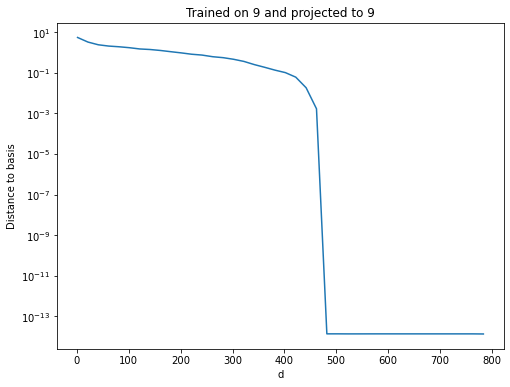

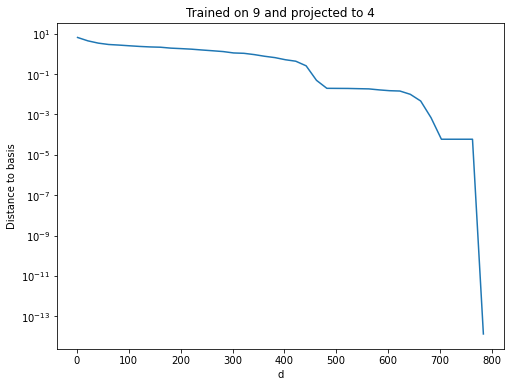

In [225]:
"Oppgave d"

#Projection on the same number as it is trained on:

b = test[:,c,19]
d_list = np.linspace(1,784,num=((784-1)//20)+1).astype(int)
distance = np.zeros(d_list.shape)

for i in range(len(distance)):
    U_d = truncSVD(u, sigma, v, d_list[i])[0]
    P_w = orthproj(U_d, b)
    distance[i] = col_distance(P_w, b)

plt.figure(figsize =(8,6))
plt.semilogy(d_list,distance)
plt.title("Trained on " + str(c) + " and projected to " + str(c))
plt.xlabel("d")
plt.ylabel("Distance to basis")
plt.show()

#Projected on another number:
c_1 = 4
b = test[:,c_1,1];   
d_list = np.linspace(1,784,num=((784-1)//20)+1).astype(int)
distance = np.zeros(d_list.shape)

for i in range(len(distance)):
    U_d = truncSVD(u, sigma, v, d_list[i])[0]
    P_w = orthproj(U_d, b)
    
    distance[i] = col_distance(P_w, b)

plt.figure(figsize =(8,6))
plt.semilogy(d_list,distance)
plt.title("Trained on " + str(c) + " and projected to " + str(c_1))
plt.xlabel("d")
plt.ylabel("Distance to basis")
plt.show()



The first plot shows that the distance from the projection to the basis becomes shorter quicker than in the second plot. This is expected for a number projected on to the correct basis. The first plot is very similar to the plot for Sigma in 2b. This is because after this point the images can be reconstructed perfectly for any integer, even if it's on the wrong basis because the span of the basis fills the whole subspace. While for the second plot you need far more vectors in the basis to reconstruct a nine perfectly. 

# Task 2e

We now want to try the ENMF approach and plot 16 of the projections comparing it to the SVD projections. 

16 projections of 9 onto the 9 basis with ENMF, with d=32


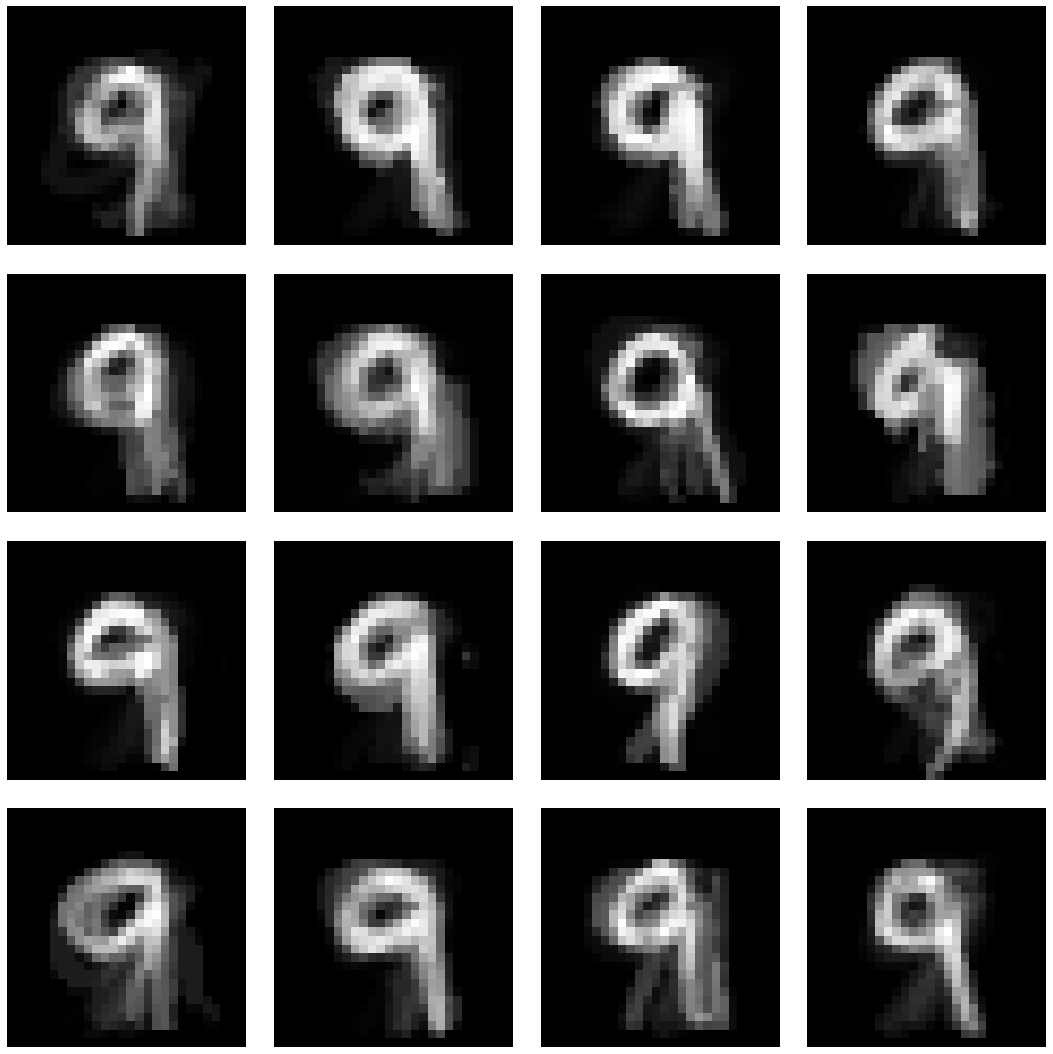

16 projections of 9 onto the 9 basis with SVD, with d=32


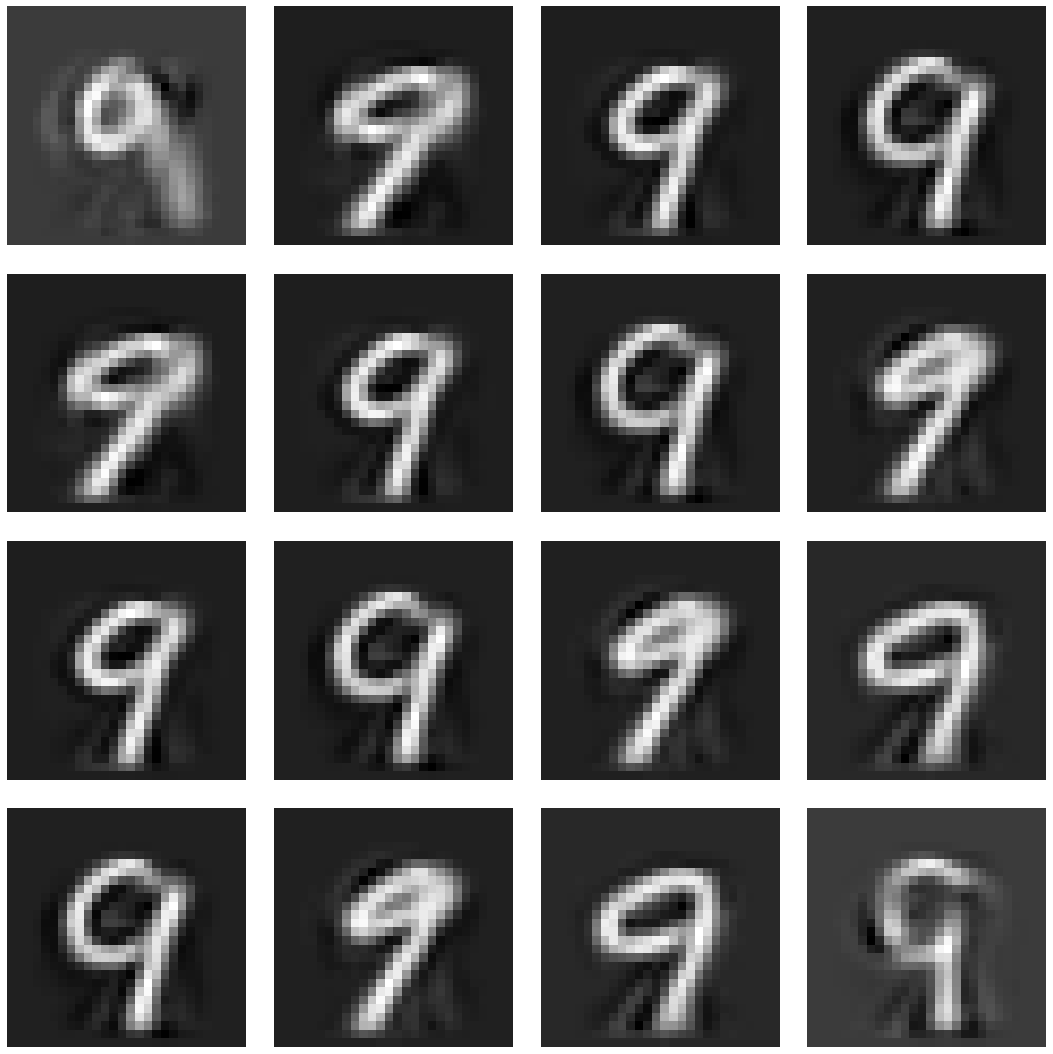

In [227]:
def nnproj2(B,A,maxiter, delta,d):  #Same function as in task 1 but expanded.
    """
    Parameters
    ----------
    B : array
        Matrix of b vectors.
    A : array
        Image matrix.
    maxiter : int
        Max iteratons of the H approximation.
    delta : float
        To avoid division by zero.
    Returns
    -------
    P_w : array
        Projection of B onto A.
    H : array
        weights matrix.
    """
    A_copy = np.copy(A).T
    
    A_new = np.zeros((d,A_copy.shape[1]))
    rand_list = np.random.choice(A.shape[1],d,replace=False)
    for i in range(d):
        A_new[i] = A_copy[rand_list[i]]
        
    W = A_new.T
    WTW = W.T@W
    WTB = W.T@B
    n = 1
    H = np.random.uniform(0,1,(d,n))
    H = H.flatten().tolist()
    for i in range(maxiter):
        H = H*WTB/(WTW@H + delta)
  
    P_w = W@H
    return P_w, H

number_of_images = 16
B = test[:,c,0]
d = 32

print("16 projections of 9 onto the 9 basis with ENMF, with d=32")    
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        P_w, H = nnproj2(B, A, 50, 10**-10,d)
        axs[i, j].imshow((P_w.reshape(28,28)),cmap='gray')

        
plt.tight_layout()
for ax in axs.flatten():
    ax.axis("off")
plt.show()

print("16 projections of 9 onto the 9 basis with SVD, with d=32") 

B = test[:,c,0:16]
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        u, sigma, v = SVD(A)
        W, H = truncSVD(u, sigma, v, d)
        P_w = orthproj(W, B.T[i+j])
        axs[i, j].imshow((P_w.reshape(28,28)),cmap='gray')
        
plt.tight_layout()
for ax in axs.flatten():
    ax.axis("off")
    
plt.show()



Using the ENMF method some of the numbers are quite blurry and distorted while others look much clearer. This is because it randomly picks better basis for the projection. While the SVD method there are 16b different nines that all look clear because we generate the best possible basis by picking the vectors that corresponds to the largest singular values. 

# Task 2f

As we now have used the ENMF approach we would like to repeat the calculations of distances as in task d) so that we can compare the data. 

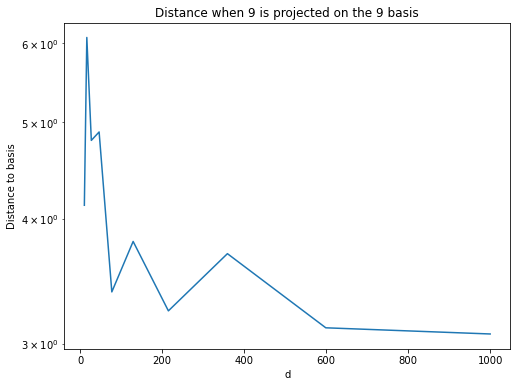

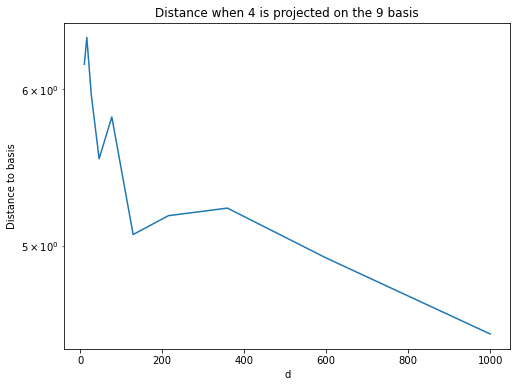

In [228]:
"Oppgave f:"
b = test[:,c,1]
d_list = np.logspace(1,3,10, dtype = np.int64)
distance = np.zeros(d_list.shape)

for i in range(len(distance)):
    P_w, H = nnproj2(b, A, 50, 10**-10,d_list[i])
    distance[i] = (col_distance(P_w, b))
    
plt.figure(figsize =(8,6))
plt.semilogy(d_list,distance)
plt.title("Distance when 9 is projected on the 9 basis")
plt.xlabel("d")
plt.ylabel("Distance to basis")
plt.show()


#Projection on with another number:
c_1 = 4
b = test[:,c_1,1];   
distance = np.zeros(d_list.shape)

for i in range(len(distance)):
    P_w, H = nnproj2(b, A, 50, 10**-10,d_list[i])
    distance[i] = (col_distance(P_w, b))
    
plt.figure(figsize =(8,6))
plt.semilogy(d_list,distance)
plt.title("Distance when 4 is projected on the 9 basis")
plt.xlabel("d")
plt.ylabel("Distance to basis")
plt.show()


For both plots the distance decreases rapidly in the beginning and then flattens out. We observe that when nine is projected on nine the distance is consistantly lower than when 4 is projected on 9. Compared to the SVD method the distance seems to decrease more rapidly in the beginning and tapers off. One would expect that the line would be smooth but more spikes because some of the randomly chosen basis are better than others. 

# Task 3

olkjhgfds


In [229]:
def distanceToBasis(W_list, B):
    """
    Parameters
    ----------
    W_list : array
        array of the u's from the SVD.
    B : array
        the image projecting down on.

    Returns
    -------
    indexes : array
        array of the numbers the program guesses the numbers are, in order it was given from the test.
    lowest_touple : touple
        the position in the test-array and what number it is.
    """
    distances = np.zeros(len(W_list))
    indexes = np.zeros(len(B.T))
    #To make sure this will always be overwritten. 
    lowest = 10000
    lowest_touple = (0,0)
    
    for j in range(len(B.T)):
        for i in range(len(W_list)):
            P_w = orthproj(W_list[i], B.T[j])
            distances[i] = col_distance( B.T[j],P_w)
            if distances[i] < lowest:
                lowest = distances[i]
                lowest_touple = (j,i)
        
        indexes[j] = np.argmin(distances)
            
    return indexes, lowest_touple

def distanceToBasis_ENMF(A,B,d,delta):
    """
    Parameters
    ----------
    A : array
        training images.
    B : array
        test images.
    d : int
        how many arrays in A to choose from..
    delta : float
        to avoid division by zero.

    Returns
    -------
    indexes : array
        array of the numbers the program guesses the numbers are, in order it was given from the test.

    """
    distances = np.zeros(A.shape[1])
    indexes = np.zeros(len(B.T))
    
    for j in range(len(B.T)):
        for i in range(A.shape[1]):
            P_w, H = nnproj2(B.T[j], A[:,i,:], 50, delta, d)
            distances[i] = col_distance(P_w, B.T[j])
        indexes[j] = np.argmin(distances)
    return indexes

def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

def generate_u_list(digits, train, d, n):
    """
    Parameters
    ----------
    digits : array
        the numbers we want to train the program on.
    train : array
        the images to train the program.
    d : int
        how much the function trucates the u matrices.
    n : int
        how many of each image the program is trained on..
    Returns
    -------
    u_list : array
        the u's from the SVD after truncating.
    """
    u_list = np.zeros((len(digits),train.shape[0], d))
    for i in range(len(digits)):
        u, sigma, v_t = SVD(train[:,i,:n])
        u = truncSVD(u, sigma, v_t, d)[0]
        u_list[i] = u
        
    return u_list

def accuracy(correctList, guessList):
    """
    Parameters
    ----------
    correctList : array
        list of correct numbers in the test array.
    guessList : array
        list of guesses in the program made.
    Returns
    -------
    float
        the share numebers correctly identified.
    wrong_index : int
        gives the index of one of the numbers that were guessed wrong.
    """
    counter = 0
    wrong_index = 0
    for i in range(len(correctList)):
        
        if correctList[i] == guessList[i]:
            counter+=1
        elif correctList[i] == 1:
            wrong_index = i
    return counter/(len(correctList)), wrong_index

def recall(digit, correctList,guessList):
    """
    Parameters
    ----------
    digit : int
        the number the function find the recall for.
    correctList : array
        array of the correct array from the test images.
    guessList : array
        array of the guesses numbers from the program.
    Returns
    -------
    float
        share of numbers correctly identified of the one digit.
    """
    digitCounter = 0
    correctCounter = 0
    for i in range(len(correctList)):
        if correctList[i] == digit:
            digitCounter += 1
            if digit == guessList[i]:
                correctCounter += 1
    return correctCounter/digitCounter

def print_results(digits, test_labels, indexes):
    """
    Parameters
    ----------
    digits : int
        the digits we want to print the results of.
    test_labels : array
        list of correct numbers in the test array.
    indexes : array
        list of the guessed numbers the program made.

    Returns
    -------
    None
    """
    correct, wrong = accuracy(test_labels, indexes)
    
    data = np.zeros((len(digits),2))
   
    for i in range(len(digits)):
        data[i][0] = i
        data[i][1] = recall(i,test_labels,indexes)
        
    
    df = pd.DataFrame(data,columns = ["integer", "recall"])
    print(df.to_string(index=False))
    print("Accuracy:",correct, '\n')

def plot_d_dependence(n, digits, train, test, number_ds, delta, tf, labe):
    """
    Parameters
    ----------
    n : int
        how many images to train on.
    digits : array
        list of the numbers we want to test.
    train : array
        list of the images we want to train on.
    test : array
        list of the images we want to guess.
    number_ds : how many d's we want to plot with
        DESCRIPTION.
    delta : float
        to avoid division my zero.
    tf : bool 
        true to plot ENMF, false to plot SVD.
    labe : string
        legend to the plot.

    Returns
    -------
    None.

    """
    d_list = np.zeros(number_ds)
    for i in range(number_ds):
        d_list[i] = 2**i
        if d_list[i] > 784:
            d_list[i] = 784
        
    a_list = np.zeros(len(d_list))
    test_sub, test_labels = generate_test(test, digits, N = 800)
    
    if tf == True:
        for i in range(number_ds):
            d_list[i] = 4*i
            if d_list[i] > 784:
                d_list[i] = 784
        
            indexes = distanceToBasis_ENMF(train, test_sub,int(d_list[i]),delta)
            correct, wrong = accuracy(test_labels, indexes)
            a_list[i] = correct
    else:
        for i in range(number_ds):
            d_list[i] = 2**i
            if d_list[i] > 784:
                d_list[i] = 784
        for i in range(len(d_list)):
            uList = generate_u_list(digits, train, int(d_list[i]), n)
            indexes,lowest = distanceToBasis(uList, test_sub)
            correct, wrong = accuracy(test_labels, indexes)
            a_list[i] = correct
            
    
    plt.plot(d_list,a_list, label = labe)
    plt.title("Accuracy depending on number of d.")
    plt.xlabel("Number of d")
    plt.ylabel("Accuracy")
    plt.legend()



# Task 3a




In [230]:

train = np.load('train.npy')/255
test = np.load('test.npy')/255
#n cant be lower than d?
n = 10000 #Number of training images
d = 32 #cutaway for orth and ENMF
digits = [0,1,2]
test_sub, test_labels = generate_test(test, digits, N = 800)

"Oppgave 3a og b for otrogonal:"

u_list = generate_u_list(digits, train, d, n) 
indexes,lowest = distanceToBasis(u_list, test_sub)
#"lowest" gives a tuple with (j,i) where i is the digit and j is the index in test_sub.

print("SDV results: ")
print_results(digits, test_labels, indexes)

"Oppgave 3a og b med ENMF: "

train_copy = train.copy()
train_copy = train_copy[:,:len(digits),:n]
delta = 10**-10
indexes1 = distanceToBasis_ENMF(train_copy, test_sub,d,delta)
print("EMNF results: ")
print_results(digits, test_labels, indexes1)

SDV results: 
 integer  recall
     0.0 0.99750
     1.0 0.99500
     2.0 0.98125
Accuracy: 0.99125 

EMNF results: 
 integer  recall
     0.0 0.99250
     1.0 0.99250
     2.0 0.96875
Accuracy: 0.9845833333333334 



From the results we can see that the recall for each individual digit is better in SVD than ENMF and therefore the total accuracy is also better for SVD. Also the code for SVD is faster.

# Task 3c

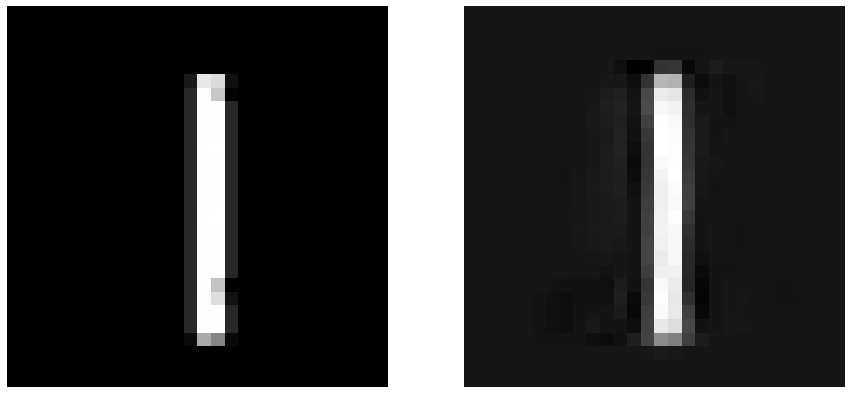

In [231]:

j,i = lowest
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(test_sub.T[j].reshape(28,28),cmap='gray')
for ax in axs.flatten():
    ax.axis("off")
P_w = orthproj(u_list[i], test_sub.T[j])
axs[1].imshow(P_w.reshape(28,28),cmap='gray')
for ax in axs.flatten():
    ax.axis("off")
plt.show()



# Task 3d

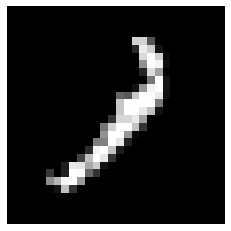

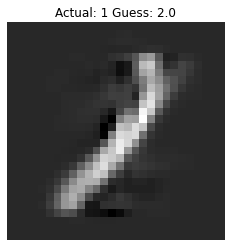

In [232]:


correct, wrong = accuracy(test_labels, indexes)

plt.imshow(test_sub.T[wrong].reshape(28,28),cmap='gray')
plt.axis("off")
plt.show()

#The wrong anwer projected to the basis it guessed it was:
P_w = orthproj(u_list[int(test_labels[wrong])], test_sub.T[wrong])
plt.imshow(P_w.reshape(28,28),cmap='gray')
plt.title("Actual: " + str(int(test_labels[wrong])) + " Guess: " + str(indexes[wrong]))
plt.axis("off")
plt.show()



The image that was misclassified has more attributes than one simple line, as most other 1 integers in the dataset. The main differences are to extra lines at the bottom and the top, which makes it harder to identify. 

# Task 3e

In [233]:
"Oppgave 3e SVD"

digits = [0,1,2,3] 
test_sub, test_labels = generate_test(test, digits, N = 800)

u, sigma, v_t = SVD(train[:,3,:n])
u = truncSVD(u, sigma, v_t, d)[0]
u_list = np.append(u_list, [u], axis = 0)

#"lowest" gives a tuple with (j,i) where i is the digit and j is the index in test_sub.
indexes,lowest = distanceToBasis(u_list, test_sub)

correct, wrong = accuracy(test_labels, indexes)
print("SDV results with extra digits:")
print_results(digits, test_labels, indexes)

"Oppgave 3e ENMF"
train_copy = train.copy()
train_copy = train_copy[:,:len(digits),:n]
delta = 10**-10
indexes1 = distanceToBasis_ENMF(train_copy, test_sub,d,delta)
print("ENMF results with extra digits: ")
print_results(digits, test_labels, indexes1)




SDV results with extra digits:
 integer  recall
     0.0 0.99750
     1.0 0.99250
     2.0 0.97125
     3.0 0.97625
Accuracy: 0.984375 

ENMF results with extra digits: 
 integer  recall
     0.0  0.9875
     1.0  0.9900
     2.0  0.9300
     3.0  0.9550
Accuracy: 0.965625 



The accuracy has decreased, as well as the recall for the individual digits, for both the ENMF and SVD. This is because the program has more basises to check, so some of the numbers that were correctly classified before have now been classified as three's. If you look at the results for SVD, the recall for 0 has not changed which means none of the zeros has been misclassified as a three. 

# Task 3f

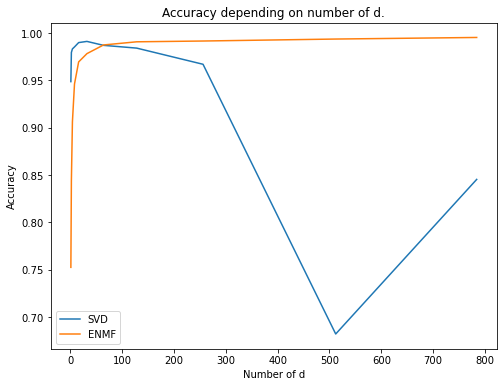

In [199]:
number_ds = 11
digits = [0,1,2]
n = 5000
delta = 10**-2
train_copy2 = train.copy()[:,:len(digits),:n]

plt.figure(figsize =(8,6))
plot_d_dependence(n, digits, train_copy2,test ,number_ds, delta, True, "ENMF")
number_ds = 196
plot_d_dependence(n, digits, train_copy2,test ,number_ds, delta, False, "SVD")
plt.show()

With respect to SVD, the main take away from the graph is that as d increases the accuracy decreases, except for the very beginning when it increases a small amount. This is because the basis is not yet big enough to make an accurate depiction of the digit. When d increases the basis for the digit becomes bigger and there will be more linearly independent vectors, meaning it can reconstruct any digit more accuratly. Therefore the distance to the dictionary will always be small. 

We are not sure why it seems to increase in accuracy after a certain point (d= +- 500). Our hypothesis: Before any of the dictionaries have filled up its basis, the accuracy will decrease slowly to a point where one of the  dictionaries are filled up. This is the lowest point on the graph, and here most, if not all guesses should be of the dicitonary that is filled. After a few more ds, the accuracy shoots up. This is because another digits' dicitonary has been filled up. So now the program will only guess between these two dictionaries. And due to numerical error, the dictionary it is meant for will be closer.(So the dictionary for 1, will be very slightly closer than to the dictionary to the 2 even when the basis is full. (ex: 10^-13, instead of 10^-12)). And this pattern continues until all digits' dicitonary has been filled up, and we get a "stair" pattern. There are problems with this hypothesis. We would expect the lowest point of the accuracy to be 1 divided på the number of didgits, but this is not the case. Also the ranks don't match the spikes in accuracy like we would expect. 

For ENMF the accuracy increases with d, particularly in the start. After it has reached this point it tapers off and stabilises at a high accuracy. Since SVD makes an ordered basis with the most important vectors from the beginning, its accuracy starts off higher than that of the ENMF method. The ENMF method does not follow a similar curve to the SVD because when the number of vectors increases the weights matrix (H) becomes better, allowing this method to not suffer from the same issues that SVD has with larger ds. 

# Task 3g



